<a href="https://colab.research.google.com/github/bhattadeb34/Claude-GPT-paper/blob/main/GPT_modification_just_plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Make sure you upload the data from zenodo (https://doi.org/10.5281/zenodo.11110873) to your google drive and mount it here. Make a folder in your google drive named as FACT_EFRC and upload the folder there after unzipping the Claude-GPT-paper.zip file

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Installing the required libraries

In [2]:
!pip install rdkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.9/34.9 MB 16.4 MB/s eta 0:00:00


In [3]:
!pip install ase

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 27.5 MB/s eta 0:00:00


## Clone the github repo (although the same data is also there in the zenodo repository except the "fact-dropbox" folder)

In [4]:
!git clone https://github.com/bhattadeb34/Claude-GPT-paper.git

Cloning into 'Claude-GPT-paper'...
remote: Enumerating objects: 162, done.
remote: Counting objects: 100% (162/162), done.
remote: Compressing objects: 100% (89/89), done.
remote: Total 162 (delta 77), reused 142 (delta 65), pack-reused 0
Receiving objects: 100% (162/162), 2.47 MiB | 9.98 MiB/s, done.
Resolving deltas: 100% (77/77), done.


In [5]:
import os
import pandas as pd
import sys
import json

# Update to include the correct path to your custom modules
functions_folder_path='/content/'
dependent_functions_path = os.path.join(functions_folder_path, 'Claude-GPT-paper', 'dependent_functions')
sys.path.append(dependent_functions_path)
from loading_roar_colab_results import load_json_as_dict, map_smiles_to_latent_df

from paper_plotting_results_notebook import (
    generate_prompt_table,
    plot_latent_space_averaged_by_prompt_grid,
    plot_stacked_plots
)

In [6]:
data_home='/content/Claude-GPT-paper/claude_outputs'

In [7]:
efrc_fact_data_home = '/content/drive/MyDrive/FACT_EFRC'

In [8]:
def setup_paths(data_home,overall_results_filename):
    paths = {
        "common_keys_path": os.path.join(efrc_fact_data_home, 'Claude-GPT-paper','fact-dropbox/zinc/tranches/out/IdentifyCommonMFPKeys-WriteAllMorganFingerprints-ConcatCSV-2D-AK-AKEC-000.json'),
        "pretrained_pca_path": os.path.join(efrc_fact_data_home,'Claude-GPT-paper', 'fact-dropbox/zinc/tranches/out/StructureEmbeddingMany-TransformMorganFingerprints-WriteAllMorganFingerprints-ConcatCSV-2D-AK-AKEC-009.lzma'),
        "overall_results_path": os.path.join(data_home,overall_results_filename),
        "base_save_path": os.path.join(data_home, 'Claude-GPT-paper', 'out', 'Figures')
    }
    return paths
def load_json_as_dict(filename):
    """
    Loads a JSON file into a Python dictionary.

    Parameters:
    - filename (str): The name of the JSON file to be loaded.

    Returns:
    - dict: The Python dictionary loaded from the JSON file.
    """
    with open(filename, 'r') as file:
        data = json.load(file)
    return data

def load_data(overall_results_path, radius, common_keys_path, pretrained_pca_path):
    overall_results = load_json_as_dict(overall_results_path)
    smiles_latent_map = map_smiles_to_latent_df(overall_results, radius, common_keys_path, pretrained_pca_path)

    return overall_results, smiles_latent_map


def generate_all_plots(overall_results, smiles_latent_map, base_save_path, data_home,quantities):

    fname = os.path.join(efrc_fact_data_home,'Claude-GPT-paper', 'fact-dropbox', 'zinc', 'tranches', 'out', 'StructureEmbeddingMany-TransformMorganFingerprints-WriteAllMorganFingerprints-ConcatCSV-2D-AK-AKEC-009.csv')
    plot_latent_space_averaged_by_prompt_grid(overall_results, smiles_latent_map, fname,  'distances_latentP_space.pdf')
    plot_stacked_plots(overall_results, smiles_latent_map, quantities,  'stacked_subplots_GPT.pdf')
    generate_prompt_table(overall_results, smiles_latent_map, word_limit_per_line=6, save_path='prompt_table.pdf')


In [9]:
overall_results_filename='claude_overall_results_A-H_2024-04-11_18-36-01.json'
quantities = ['validity_ratio', 'chemical_diversity']
paths = setup_paths(data_home,overall_results_filename)
overall_results, smiles_latent_map = load_data(paths['overall_results_path'], 2, paths['common_keys_path'], paths['pretrained_pca_path'])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator StandardScaler from version 1.3.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator PCA from version 1.3.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


# Figure 4, 5 and Table 1 (although the one in the paper is written in latex)

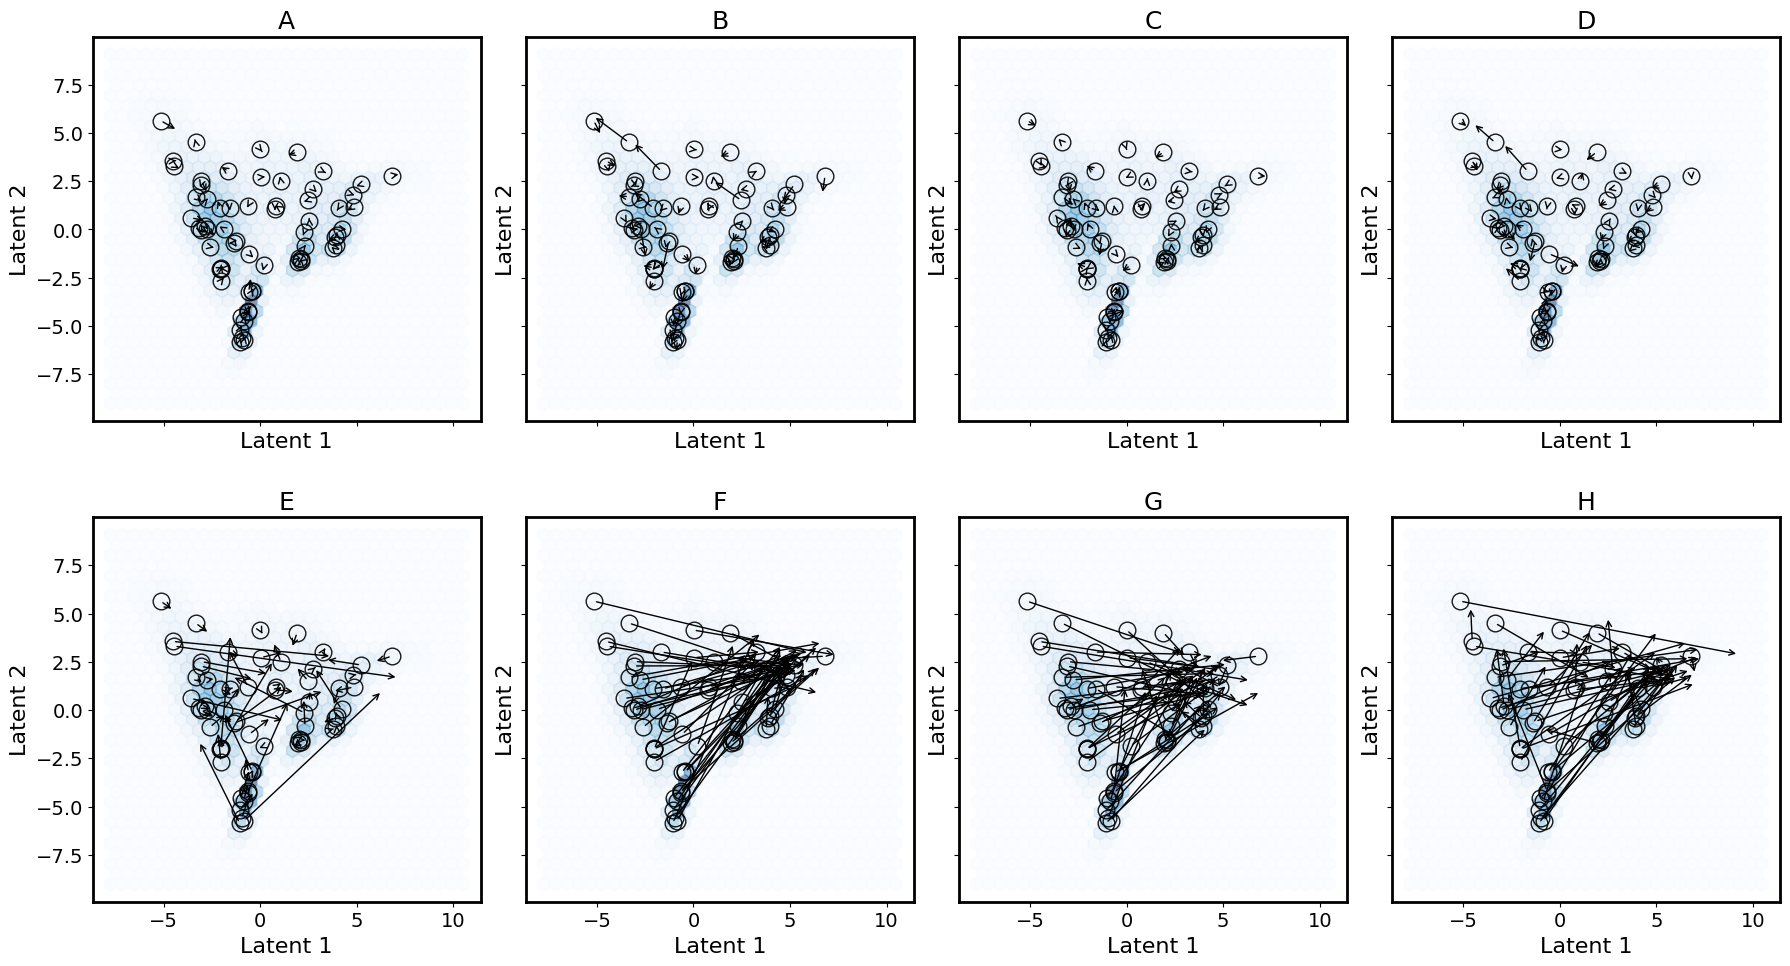

/content/Claude-GPT-paper/dependent_functions/paper_plotting_results_notebook.py:737: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[0], data=distance_plot_df, x='Prompt Identifier', y='Distance', palette=palette)
/content/Claude-GPT-paper/dependent_functions/paper_plotting_results_notebook.py:749: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[i + 1], data=filtered_data, x='Prompt Identifier', y='Value', palette=palette)
/content/Claude-GPT-paper/dependent_functions/paper_plotting_results_notebook.py:749: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the sam

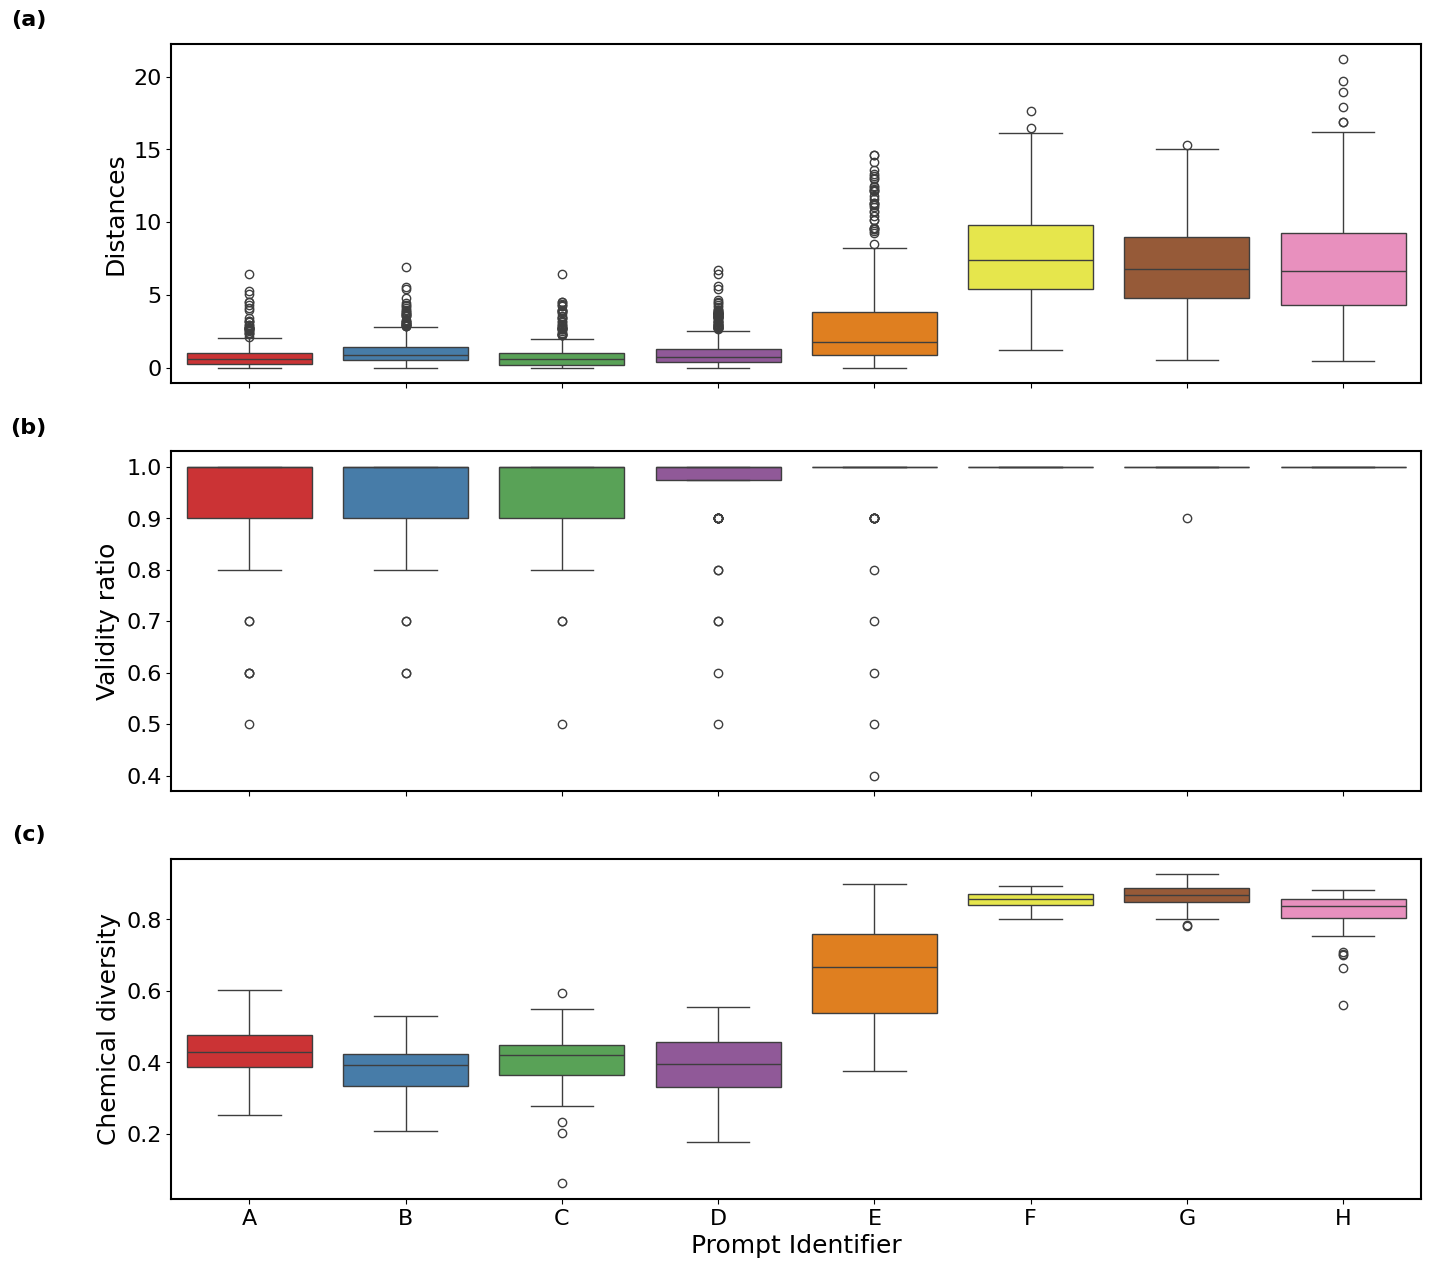

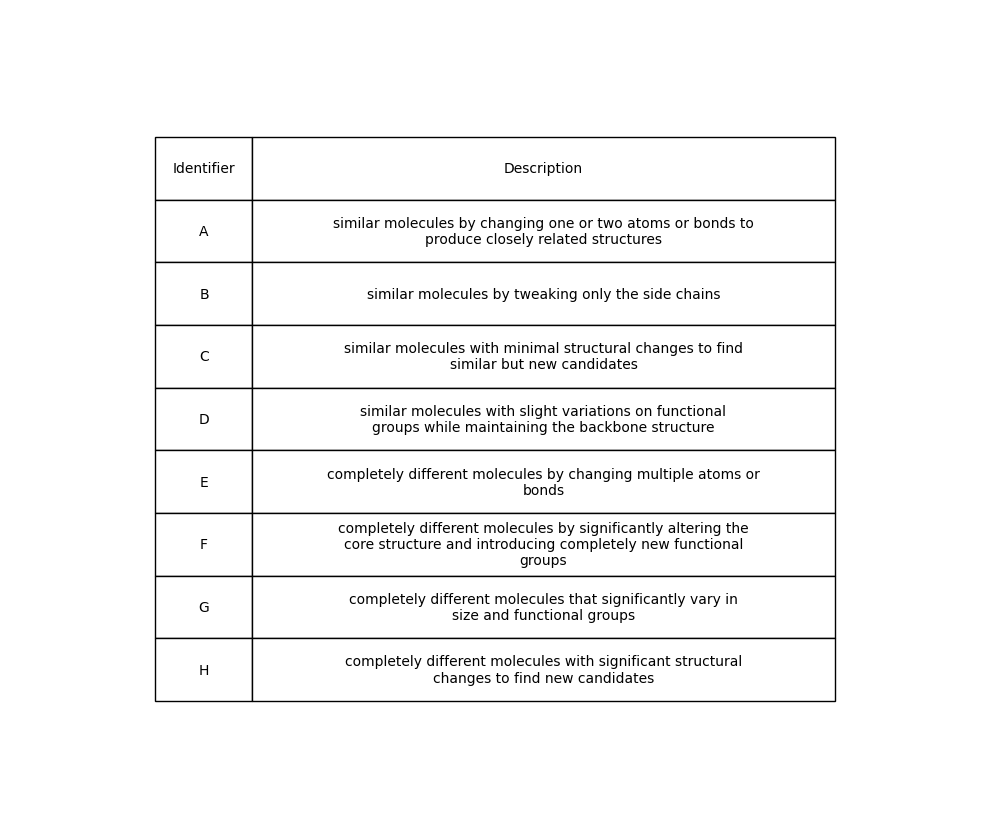

In [10]:
generate_all_plots(overall_results, smiles_latent_map, paths['base_save_path'],data_home,quantities)

# HOMO-HOMO energy differences between generated and parent

In [11]:
from homo_lumo_energies import plot_combined_homo_lumo_energy_differences

In [13]:
import json
import pandas as pd

def load_dict_from_json(filename):
    with open(filename, 'r') as file:
        deserialized_data = json.load(file)

    def convert_to_original(value):
        if isinstance(value, list):
            # Check if the list can be converted to a pandas Series
            if all(isinstance(v, (int, float, str)) for v in value):
                return pd.Series(value)
            else:
                return [convert_to_original(v) for v in value]
        elif isinstance(value, dict):
            return {k: convert_to_original(v) for k, v in value.items()}
        else:
            return value

    # Convert the deserialized data back to the original format
    converted_data = convert_to_original(deserialized_data)

    return converted_data

In [14]:
claude_charge_data_home="/content/Claude-GPT-paper/pm7_charge_results"

In [21]:
charge_A_H_results_filename='charge_claude_overall_results_A-H_2024-04-11_18-36-01.json'
charge_EWG_results_filename='charge_claude_overall_results_EWG_hickner2024-04-11_02-08-21.json'
charge_EDG_results_filename='charge_claude_overall_results_EDG_hickner2024-04-12_11-13-35.json'
A_H_results=load_dict_from_json(os.path.join(claude_charge_data_home,charge_A_H_results_filename))
EWG_results=load_dict_from_json(os.path.join(claude_charge_data_home,charge_EWG_results_filename))
EDG_results=load_dict_from_json(os.path.join(claude_charge_data_home,charge_EDG_results_filename))

<ipython-input-17-af822887341e>:54: UserWarning: The palette list has more values (12) than needed (3), which may not be intended.
  ax = sns.boxplot(x='Prompt', y='Energy Difference', hue='Group', data=df_energy_diff[df_energy_diff['Type'] == type_key], palette=palette, order=plot_order)


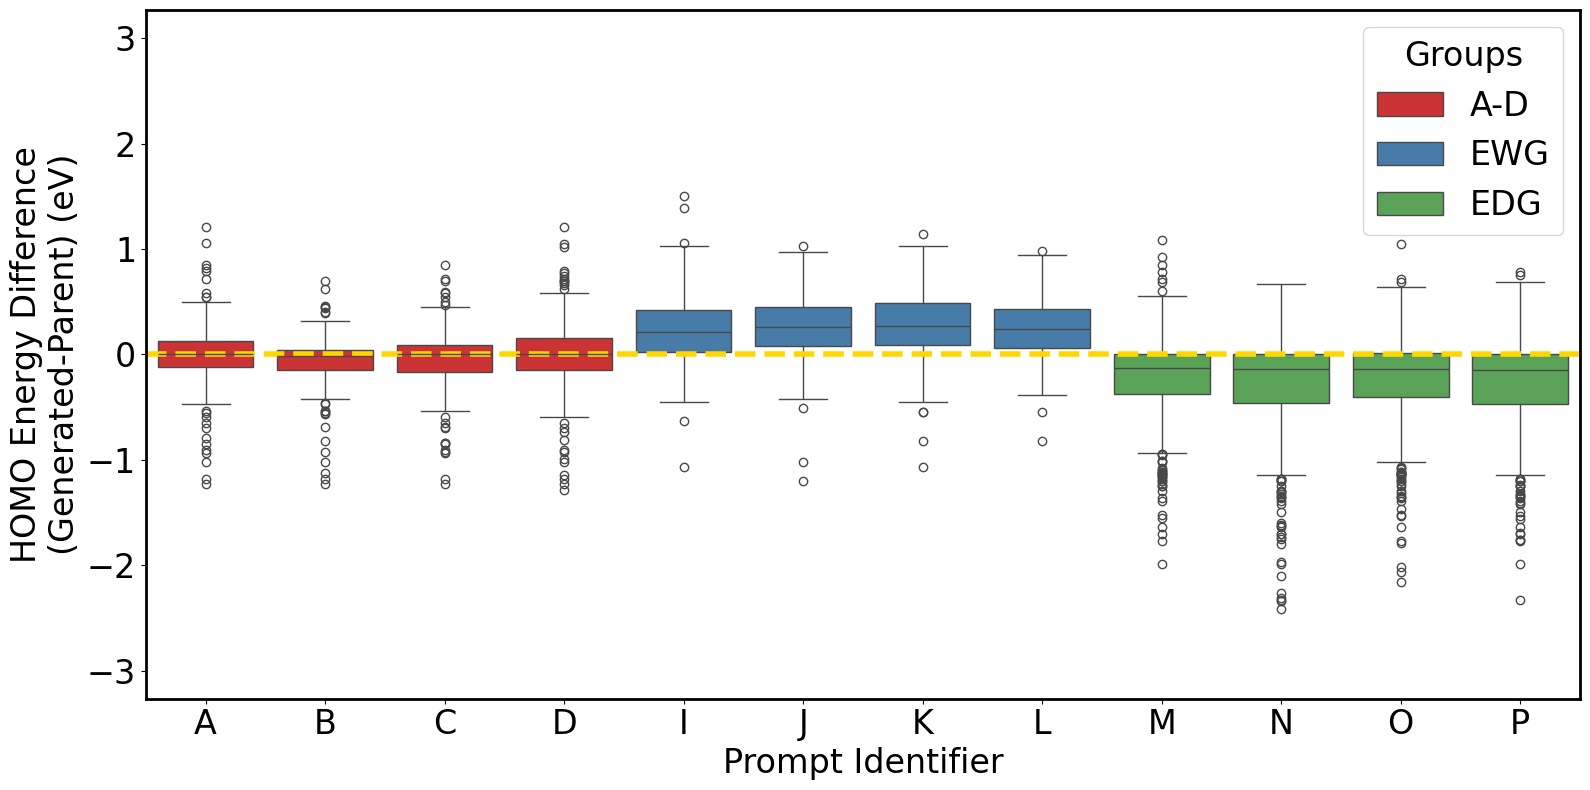

In [24]:

homo_lumo_save_path_filename='homo_lumo'
plot_combined_homo_lumo_energy_differences(
    A_H_results['energy_differences_deviation_by_prompt'],
    EWG_results['energy_differences_deviation_by_prompt'],
    EDG_results['energy_differences_deviation_by_prompt'],
    A_H_results['filtered_prompt_mapping'],
    EWG_results['filtered_prompt_mapping'],
    EDG_results['filtered_prompt_mapping'],
    figsize=(16, 8),
    condense_percentile=0.99,
    save_path=homo_lumo_save_path_filename
)
